In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/DATA/TRAIN'
test_path = '/content/drive/MyDrive/DATA/TEST'

Mounted at /content/drive


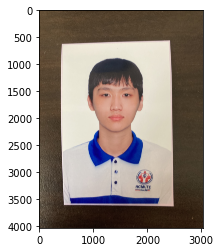

In [ ]:
img = load_img('/content/drive/MyDrive/DATA/TRAIN/HUY/MinhHuy (1).jpg')
plt.imshow(img)

In [ ]:
DATADIR = '/content/drive/MyDrive/DATA'

In [ ]:
cv2.imread('/content/drive/MyDrive/DATA/TRAIN/HUY/MinhHuy (7).jpg').shape

(2320, 2320, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_TRAIN = ImageDataGenerator(rescale=1/255)
X_TEST = ImageDataGenerator(rescale=1/255)

In [ ]:
TRAIN = X_TRAIN.flow_from_directory(directory=r"/content/drive/MyDrive/DATA/TRAIN",target_size=(150, 150),batch_size=13,class_mode="categorical",color_mode="rgb",)
TEST  = X_TEST.flow_from_directory(directory=r"/content/drive/MyDrive/DATA/TEST",target_size=(150, 150),batch_size=13,class_mode="categorical",color_mode="rgb",)

Found 143 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


In [ ]:
TRAIN.class_indices

{'HOA': 0, 'HUY': 1, 'TOAN': 2}

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(35,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(27,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(81,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(81,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(9,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 35)      980       
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 13)      4108      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 13)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73125)             0         
                                                                 
 dense_5 (Dense)             (None, 27)                1974402   
                                                                 
 dense_6 (Dense)             (None, 81)                2268      
                                                      

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(TRAIN,epochs=50,batch_size=13,verbose=1,validation_data=TEST)

Epoch 1/50
11/11 [==============================] - 18s 2s/step - loss: 1.8806 - accuracy: 0.3706 - val_loss: 0.7230 - val_accuracy: 0.9623
Epoch 2/50
11/11 [==============================] - 17s 2s/step - loss: 0.3724 - accuracy: 0.9091 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 3/50
11/11 [==============================] - 17s 2s/step - loss: 0.0349 - accuracy: 0.9860 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4/50
11/11 [==============================] - 17s 2s/step - loss: 0.0116 - accuracy: 0.9930 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/50
11/11 [==============================] - 17s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 8.6629e-04 - val_accuracy: 1.0000
Epoch 6/50
11/11 [==============================] - 17s 2s/step - loss: 2.9294e-04 - accuracy: 1.0000 - val_loss: 1.2075e-04 - val_accuracy: 1.0000
Epoch 7/50
11/11 [==============================] - 17s 2s/step - loss: 1.1007e-04 - accuracy: 1.0000 - val_loss: 9.8359e-05 - val_accuracy: 1.0000


In [ ]:
model.save('Face-Detector.h5')

In [ ]:
score=model.evaluate(TEST,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])

5/5 [==============================] - 4s 784ms/step - loss: 6.9792e-04 - accuracy: 1.0000
Test loss= 0.0006979159079492092
Test accuracy= 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

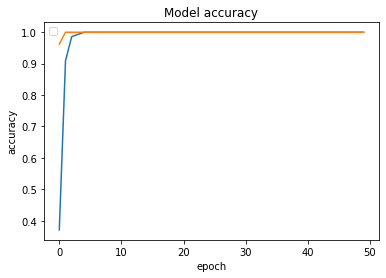

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
Hello_OPENLAB = load_model('/content/Face-Detector.h5')

In [ ]:
labels = {0: 'Hoa', 1: 'Huy', 2: 'Toan'}

This is:  Hoa


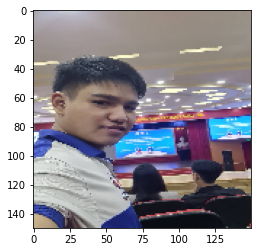

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/HOA.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  Huy


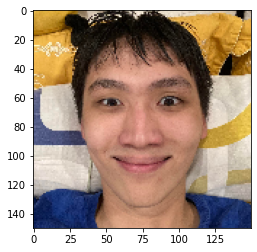

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/HUY.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  Toan


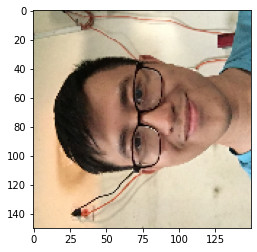

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/TOAN.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])